In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('glassdoor_salary_cleaned.csv')
# job title and seniority
# fix state los angeles
# jd length
# competitor count
# hourly wage to annual
# remove new line from job title

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name_text', 'job_state', 'same_state', 'age', 'python_jd',
       'rstudio_jd', 'aws_jd', 'spark_jd', 'excel_jd'],
      dtype='object')

In [5]:
df['Job Title'].value_counts()

Data Scientist                                                    131
Data Engineer                                                      53
Senior Data Scientist                                              34
Data Analyst                                                       15
Senior Data Engineer                                               14
                                                                 ... 
Software Engineer Staff Scientist: Human Language Technologies      1
Senior Research Statistician- Data Scientist                        1
E-Commerce Data Analyst                                             1
RESEARCH SCIENTIST - BIOLOGICAL SAFETY                              1
Financial Data Analyst                                              1
Name: Job Title, Length: 264, dtype: int64

In [6]:
def title_simplify(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [7]:
df['job_simplified'] = df['Job Title'].apply(lambda x: title_simplify(x))
df['job_simplified'].value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simplified, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(lambda x: seniority(x))
df['seniority'].value_counts()

na        519
senior    220
jr          3
Name: seniority, dtype: int64

In [9]:
# fix state los angeles
df['job_state'] = df['job_state'].apply(lambda x: x.strip().lower() == 'los angeles' and 'CA' or x.strip())
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
MO      9
AZ      9
AL      8
KY      6
MI      6
GA      6
DE      6
CT      5
IA      5
LA      4
NE      4
OR      4
NM      3
KS      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [10]:
# jd length
df['jd_len'] = df['Job Description'].apply(lambda x: len(x))
df['jd_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: jd_len, Length: 742, dtype: int64

In [11]:
df['competitor_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['competitor_count'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: competitor_count, dtype: int64

In [12]:
# hourly wage to annual
# df[df['Salary Estimate'].apply(lambda x: 'hour' in x.lower())]['Salary Estimate']
df['min_salary'] = df.apply(lambda x: x['hourly'] == 1 and x['min_salary']*2 or x['min_salary'], axis = 1)
df['max_salary'] = df.apply(lambda x: x['hourly'] == 1 and x['max_salary']*2 or x['max_salary'], axis = 1)

In [13]:
df[['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
0,0,53,91
1,0,63,112
2,0,80,90
3,0,56,97
4,0,86,143
...,...,...,...
737,0,58,111
738,0,72,133
739,0,56,91
740,0,95,160


### EDA

In [14]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_jd,rstudio_jd,aws_jd,spark_jd,excel_jd,jd_len,competitor_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.001348,0.237197,0.225067,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.036711,0.425651,0.417908,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


<AxesSubplot:>

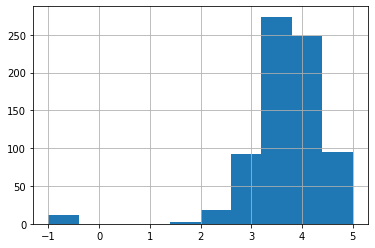

In [15]:
df['Rating'].hist()

<AxesSubplot:>

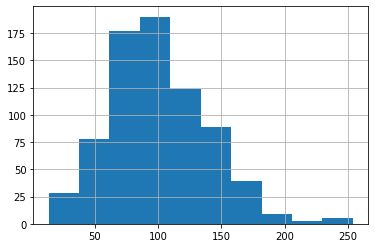

In [16]:
df['avg_salary'].hist()

<AxesSubplot:>

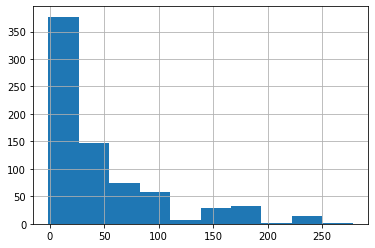

In [17]:
df['age'].hist()

<AxesSubplot:>

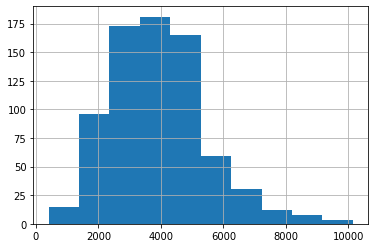

In [18]:
df['jd_len'].hist()

<AxesSubplot:>

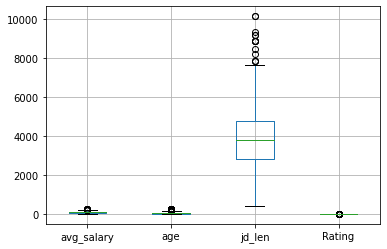

In [20]:
df.boxplot(column=['avg_salary', 'age', 'jd_len', 'Rating'])

<AxesSubplot:>

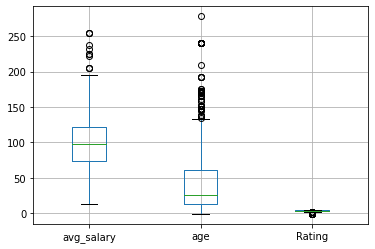

In [21]:
# it is observed that jd_len needs to be normalized
df.boxplot(column=['avg_salary', 'age', 'Rating'])

In [22]:
df[['avg_salary', 'age', 'Rating', 'jd_len']].corr()

,avg_salary,age,Rating,jd_len
avg_salary,1.000000,0.019492,0.013492,0.078093
age,0.019492,1.000000,0.024665,0.165628
Rating,0.013492,0.024665,1.000000,-0.012631
jd_len,0.078093,0.165628,-0.012631,1.000000


<AxesSubplot:>

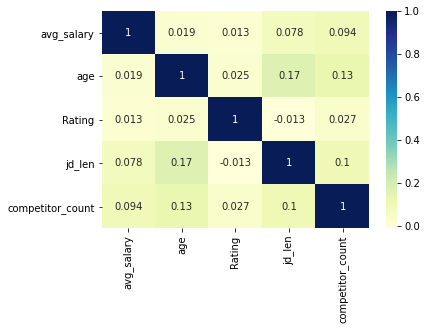

In [26]:
sns.heatmap(df[['avg_salary', 'age', 'Rating', 'jd_len', 'competitor_count']].corr(), cmap="YlGnBu", annot=True)

In [25]:
# jd_len and age are highly correlated, age and competitor_count next, then avg_salary and competitor_count
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name_text', 'job_state', 'same_state', 'age', 'python_jd',
       'rstudio_jd', 'aws_jd', 'spark_jd', 'excel_jd', 'job_simplified',
       'seniority', 'jd_len', 'competitor_count'],
      dtype='object')

graph for Location: total=200


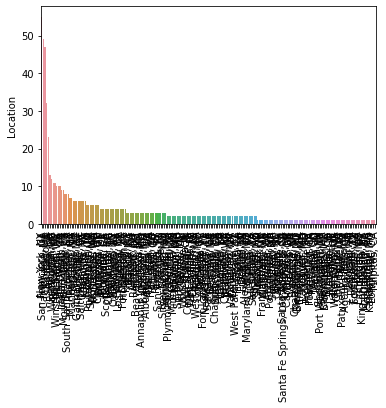

graph for Headquarters: total=198


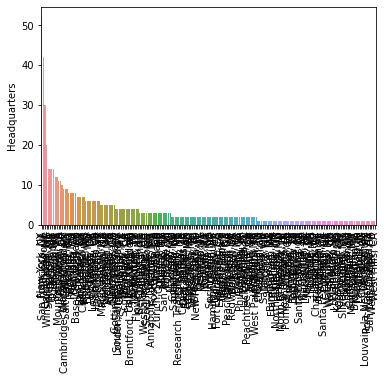

graph for Size: total=9


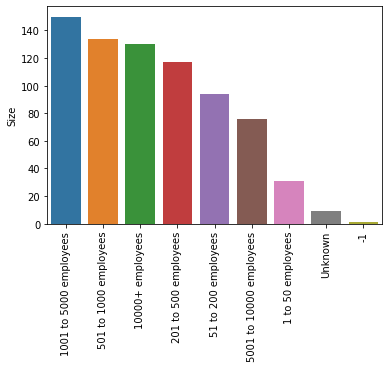

graph for Type of ownership: total=11


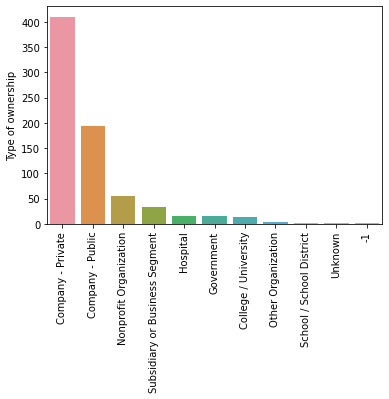

graph for Industry: total=60


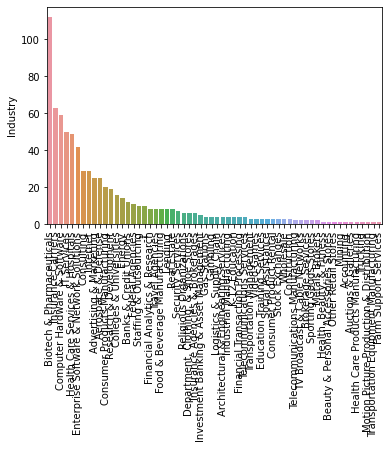

graph for Sector: total=25


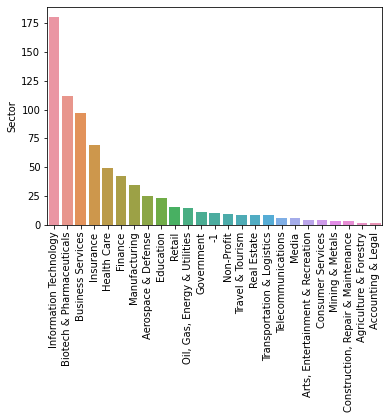

graph for Revenue: total=14


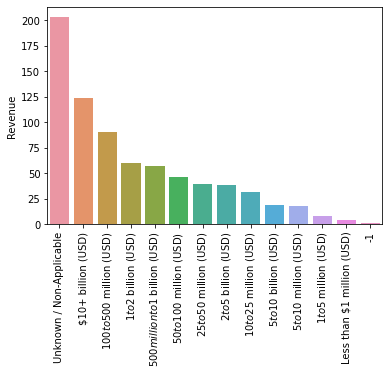

graph for company_name_text: total=343


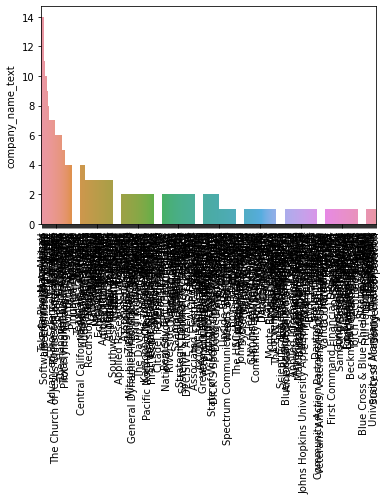

graph for job_state: total=37


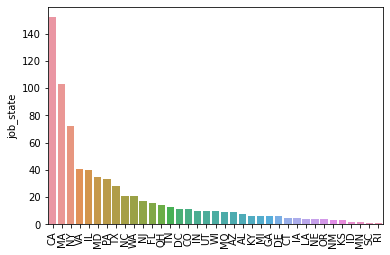

graph for same_state: total=2


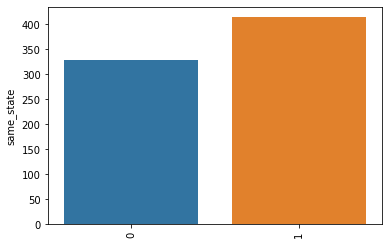

graph for python_jd: total=2


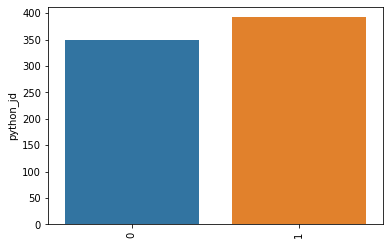

graph for rstudio_jd: total=2


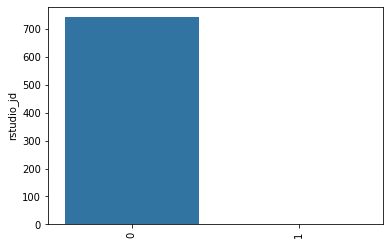

graph for aws_jd: total=2


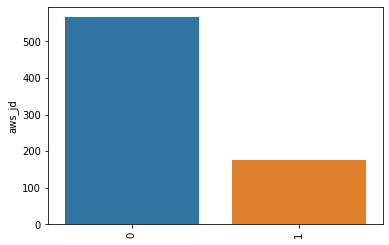

graph for spark_jd: total=2


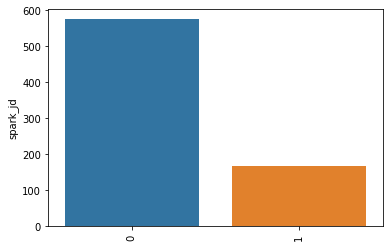

graph for excel_jd: total=2


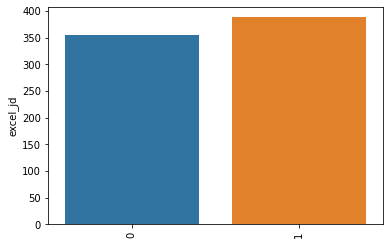

graph for job_simplified: total=7


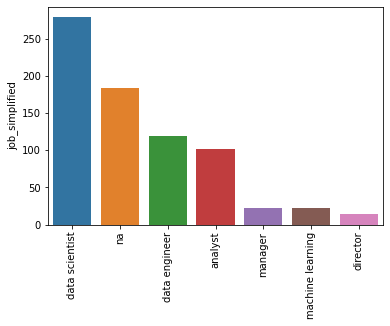

graph for seniority: total=3


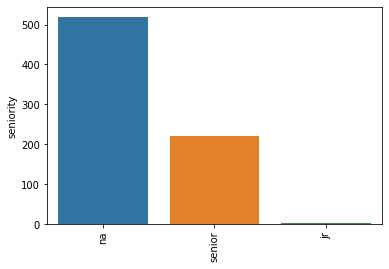

graph for jd_len: total=439


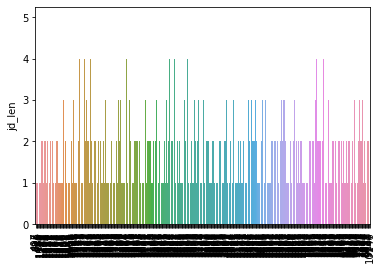

In [32]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name_text', 'job_state', 'same_state', 'python_jd',
       'rstudio_jd', 'aws_jd', 'spark_jd', 'excel_jd', 'job_simplified',
       'seniority']]
for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print('graph for {}: total={}'.format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total=20


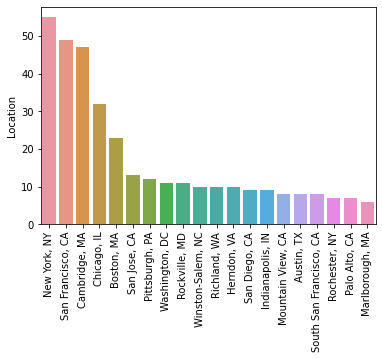

graph for Headquarters: total=20


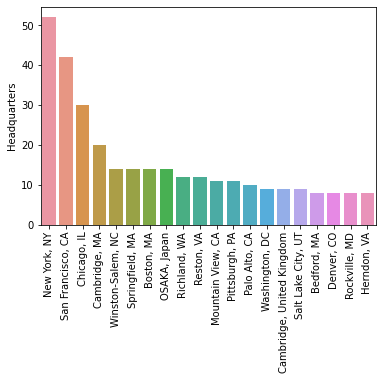

graph for company_name_text: total=20


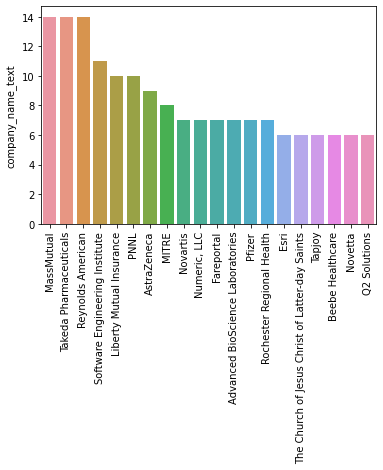

In [33]:
for i in df_cat[['Location', 'Headquarters', 'company_name_text']]:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for {}: total={}'.format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [34]:
# from company_name_text barchart, it is interesting to note that giant tech companies like Amazon, FB not top the list

In [35]:
pd.pivot_table(df, index='job_simplified', values='avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
machine learning,126.431818
manager,84.022727
na,84.853261


In [36]:
pd.pivot_table(df, index=['job_simplified', 'seniority'], values='avg_salary')

avg_salary
job_simplified   seniority            
analyst          jr          53.250000
                 na          61.308219
                 senior      79.092593
data engineer    na          96.701220
                 senior     124.689189
data scientist   jr         106.500000
                 na         107.043011
                 senior     138.956522
director         na         168.607143
machine learning na         119.133333
                 senior     142.071429
manager          na          84.022727
na               na          73.988189
                 senior     109.061404

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.pivot_table(df, index=['job_state','job_simplified'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

<ipython-input-51-65a05a6fb5b3>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


avg_salary
job_state job_simplified              
WI        na                4         
          data scientist    3         
          analyst           3         
WA        na                1         
          data scientist    17        
          analyst           3         
VA        na                5         
          machine learning  2         
          data scientist    18        
          data engineer     10        
          analyst           6         
UT        data engineer     3         
          analyst           4         
          data scientist    3         
TX        na                7         
          data scientist    13        
          data engineer     8         
TN        data scientist    1         
          data engineer     10        
          analyst           2         
SC        na                1         
RI        analyst           1         
PA        machine learning  7         
          data engineer     1         
          data scientist    6         
          analyst           8         
          manager           3         
          na                8         
OR        data scientist    3         
          data engineer     1         
OH        na                3         
          data scientist    7         
          analyst           4         
NY        na                12        
          machine learning  2         
          data scientist    40        
          data engineer     4         
          analyst           14        
NM        data scientist    3         
NJ        data scientist    4         
          analyst           6         
          data engineer     2         
          manager           2         
          director          2         
          na                1         
NE        na                4         
NC        na                12        
          data scientist    3         
          data engineer     6         
MO        na                3         
          manager           1         
          data scientist    3         
          analyst           2         
MN        data engineer     1         
          analyst           1         
MI        manager           2         
          data scientist    4         
MD        na                16        
          data scientist    13        
          data engineer     3         
          analyst           3         
MA        na                46        
          manager           5         
          director          6         
          data scientist    30        
          data engineer     12        
          analyst           4         
LA        analyst           1         
          data engineer     2         
          na                1         
KY        na                4         
          data scientist    2         
KS        machine learning  3         
IN        na                4         
          data scientist    2         
          data engineer     4         
IL        analyst           3         
          na                6         
          machine learning  2         
          director          6         
          data scientist    15        
          data engineer     8         
ID        analyst           2         
IA        analyst           2         
          data engineer     3         
GA        data scientist    3         
          na                3         
FL        data scientist    7         
          data engineer     3         
          analyst           6         
DE        na                6         
DC        data scientist    5         
          data engineer     4         
          analyst           2         
CT        na                3         
          data scientist    2         
CO        machine learning  1         
          data engineer     3         
          analyst           1         
          na                3         
          data scientist    3         
CA        n

In [52]:
# only data scientist role
pd.pivot_table(df[df['job_simplified'] == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name_text', 'job_state', 'same_state', 'age', 'python_jd',
       'rstudio_jd', 'aws_jd', 'spark_jd', 'excel_jd', 'job_simplified',
       'seniority', 'jd_len', 'competitor_count'],
      dtype='object')

In [57]:
df_pivot = df[['Rating', 'Industry', 'Sector', 'Revenue', 'competitor_count', 'hourly', 'employer_provided', 'python_jd', 'rstudio_jd', 'aws_jd', 'spark_jd', 'excel_jd', 'Type of ownership', 'avg_salary']]
for column in df_pivot.columns[:-1]:
    print(pd.pivot_table(df_pivot, index=column, values='avg_salary').sort_values('avg_salary', ascending=False))
    print("-"*50)

        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2    97.750000 
 4.6    97.250000 
 3.8    96.811475 
 2.1    95.900000 
 3.4    93.011364 
 1.9    87.500000 
 3.1    86.580000 
 3.0    85.588235 
 3.6    85.467391 
 2.8    83.928571 
 2.7    83.250000 
 2.3    81.500000 
 2.9    81.138889 
 4.8    80.277778 
 2.4    60.214286 
--------------------------------------------------
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Tele

In [67]:
# wordcloud of jd
# import nltk
# nltk.download('punkt')
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankujayu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


2902089


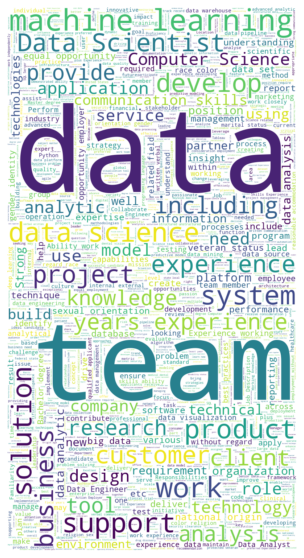

In [73]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for word in word_tokens:
        if word not in stop_words and word.isalpha():
            filtered.append(word)
    return filtered

unwanted = []
words_filtered = punctuation_stop(words)
print("Num of filtered words: ", len(words_filtered))

text = " ".join(words_filtered)

wc = WordCloud(background_color='white', random_state=1, stopwords = STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [74]:
df.to_csv('eda_data.csv')